In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft

## 1. Loading the data:

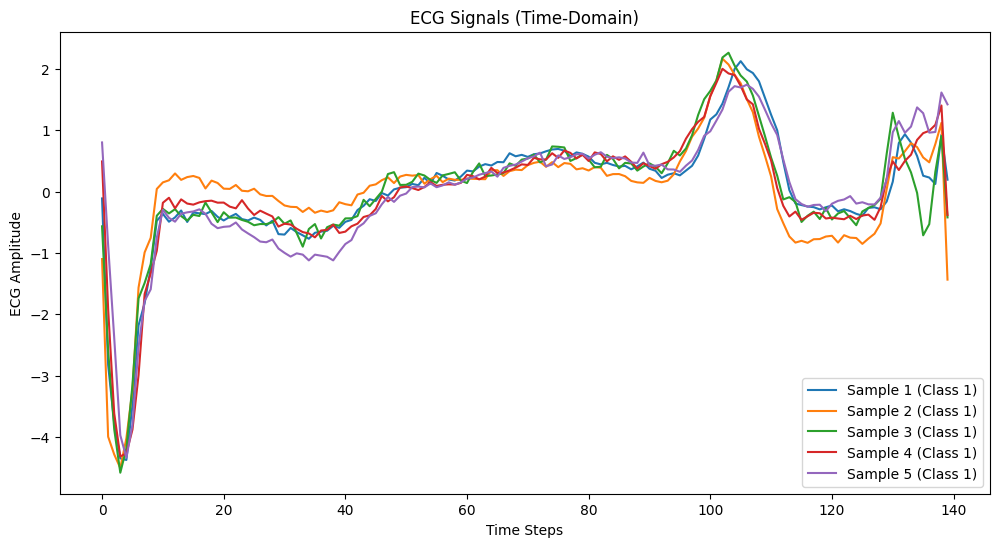

In [8]:
data = np.loadtxt("data/ECG5000_TRAIN.txt")

labels=data[:,0].astype(int)
signals=data[:,1:]


num_samples=5

plt.figure(figsize=(12,6))

for i in range(num_samples):
    plt.plot(signals[i], label=f"Sample {i+1} (Class {int(labels[i])})")

plt.xlabel("Time Steps")
plt.ylabel("ECG Amplitude")
plt.title("ECG Signals (Time-Domain)")
plt.legend()
plt.show()

## 2. Concatenate signals:

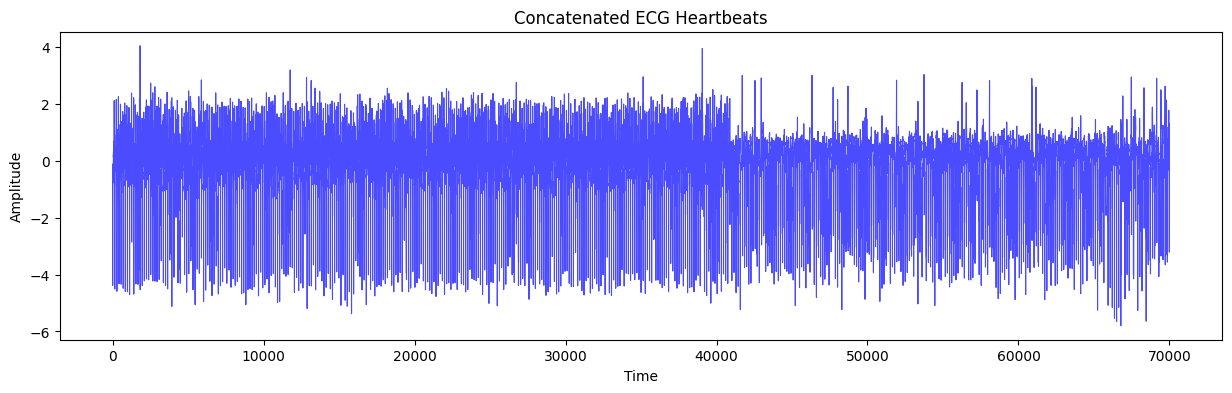

In [9]:
# Concatenate all ECG signals into one long time-series
concatenated_signal = signals.flatten()

# Plot concatenated heartbeats
plt.figure(figsize=(15, 4))
plt.plot(concatenated_signal, color='blue', alpha=0.7, linewidth=0.8)
plt.title("Concatenated ECG Heartbeats")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
unique_classes= np.unique(labels)

plt.figure(figsize=(12,8))

for i, class_label in enumerate(unique_classes):
    #Select the first few examples from each class
    class_signals = signals[labels == class_label[:5]]
    for j,sig in enumerate(class_signals):
        plt.plot(sig+j*5,label=f"Class {class_labels}" if j==0 else "", alpha=0.8)
plt.title("ECG Heartbeats by Class")
plt.xlabel("Time")
plt.ylabel("Amplitude (offset for clarity)")
plt.legend()
plt.show()        